## Author: Fang Jung(Kristy) Lin 
## Purpose: Applied Lasso & Ridge regularization to predict salary for a baseball player

# Import necessary packages

In [1]:
import numpy as np
import pandas as pd
import random
import os

from matplotlib import pyplot as plt
import pylab as pl
from matplotlib.ticker import PercentFormatter
from pylab import rcParams
import seaborn as sns

import statsmodels.api as sm
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Purpose for the analysis

*   Use regularization to predict salaries for a sports player

*   Explain the output of the regularized models

# Part1. Data Acquisition and Exploration

### Data Acquisition

The actual path to downloadable CSV is: https://docs.google.com/spreadsheets/d/e/2PACX-1vQnCBYTMPacq9vBxr8TI50srTuTcOEskudR6ByImXpEcs9rSm7fpxIhpw8u9LnRDkvfBPJoC4sT--TN/pub?gid=34632086&single=true&output=csv

Read data from Google sheet and explore the data frame

In [2]:
data_path = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQnCBYTMPacq9vBxr8TI50srTuTcOEskudR6ByImXpEcs9rSm7fpxIhpw8u9LnRDkvfBPJoC4sT--TN/pub?gid=34632086&single=true&output=csv'
my_df = pd.read_csv(data_path)

my_df.head(3)

,Salary,count_at_bats,count_hits,count_home_runs,count_runs,RBI,count_walks,years_experience,cumulative_at_bats,cumulative_hits,cumulative_home_runs,cumulative_runs,cumulative_RBI,cumulative_walks,League,Division,PutOuts,Assists,Errors,NewLeague
0,875000,457,101,14,42,63,22,17,6521,1767,281,1003,977,619,A,W,389,39,4,A
1,1300000,441,118,28,84,86,68,8,2723,750,126,433,420,309,A,E,190,2,2,A
2,940000,593,152,23,69,75,53,6,2765,686,133,369,384,321,A,W,315,10,6,A


### Interpret the data

In [3]:
list(my_df)

['Salary',
 'count_at_bats',
 'count_hits',
 'count_home_runs',
 'count_runs',
 'RBI',
 'count_walks',
 'years_experience',
 'cumulative_at_bats',
 'cumulative_hits',
 'cumulative_home_runs',
 'cumulative_runs',
 'cumulative_RBI',
 'cumulative_walks',
 'League',
 'Division',
 'PutOuts',
 'Assists',
 'Errors',
 'NewLeague']

Data interpretion

*   Salary: salary of the player
*   count_at_bats: the count number of bats
*   count_hits: the count number of hits
*   count_home_runs: the count number of home runs
*   count_runs: the count number of runs
*   RBI: credits a batter for making a play that allows a run to be scored
*   count_walks: the count number of walks
*   years_experience: years spend in the field
*   cumulative_at_bats: cumulative number of bats
*   cumulative_hits: cumulative number of hits
*   cumulative_home_runs: cumulative number of home runs
*   cumulative_runs: cumulative number of runs
*   cumulative_RBI: cumulative number of RBI
*   cumulative_walks: cumulative number of walks
*   League: which league is player in
*   Division: the division of the league
*   PutOuts: the number count of a player tagging a runner with the ball when he is not touching a base
*   Assists: the number count of a player who touches the ball before a putout is recorded by another fielder
*   Errors: the number count of a player who misplay a ball
*   NewLeague: new league of a player

### Data Preprocessing

Check both the datatypes and if there are missing values

In [4]:
print('Datatype:\n', my_df.dtypes)
print('Missing values:\n', my_df.isnull().any())

Datatype:
 Salary                   int64
count_at_bats            int64
count_hits               int64
count_home_runs          int64
count_runs               int64
RBI                      int64
count_walks              int64
years_experience         int64
cumulative_at_bats       int64
cumulative_hits          int64
cumulative_home_runs     int64
cumulative_runs          int64
cumulative_RBI           int64
cumulative_walks         int64
League                  object
Division                object
PutOuts                  int64
Assists                  int64
Errors                   int64
NewLeague               object
dtype: object
Missing values:
 Salary                  False
count_at_bats           False
count_hits              False
count_home_runs         False
count_runs              False
RBI                     False
count_walks             False
years_experience        False
cumulative_at_bats      False
cumulative_hits         False
cumulative_home_runs    False
cumulati

### Explore the data set

In [5]:
my_df.describe().round(3)

,Salary,count_at_bats,count_hits,count_home_runs,count_runs,RBI,count_walks,years_experience,cumulative_at_bats,cumulative_hits,cumulative_home_runs,cumulative_runs,cumulative_RBI,cumulative_walks,PutOuts,Assists,Errors
count,243.000,243.000,243.000,243.000,243.000,243.000,243.000,243.000,243.000,243.000,243.000,243.000,243.000,243.000,243.000,243.000,243.000
mean,396485.597,377.621,99.975,10.667,50.123,47.362,38.115,7.473,2654.498,717.704,71.831,362.062,332.070,263.712,284.263,102.782,7.630
std,420524.106,151.222,45.997,8.450,25.186,25.643,21.239,5.018,2344.518,657.431,88.616,337.841,333.997,277.955,275.127,134.263,6.245
min,0.000,16.000,2.000,0.000,1.000,0.000,0.000,1.000,19.000,4.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
25%,70000.000,255.500,64.000,4.000,31.000,29.000,22.000,4.000,826.500,209.500,14.000,100.500,91.500,66.500,113.500,6.500,3.000
50%,250000.000,360.000,95.000,8.000,48.000,44.000,34.000,6.000,1931.000,510.000,39.000,258.000,230.000,174.000,211.000,33.000,6.000
75%,666500.000,511.000,136.000,16.000,68.500,63.500,52.000,11.000,3890.500,1037.500,93.000,523.500,424.500,329.500,322.500,151.500,10.000
max,1975000.000,687.000,238.000,40.000,117.000,121.000,105.000,24.000,14053.000,4256.000,548.000,2165.000,1659.000,1566.000,1378.000,492.000,32.000


From the table above, we can get some information.

* The average salary of the player is 396k.

*  The standard deviation of the salary is huge, which means that the salary range is quite huge.

*  The min salary is 0, which we need further exploration


### Explore the data with salary equals to zero

In [6]:
sal_df = my_df[my_df['Salary'] ==0]
sal_df.describe().round(3)

,Salary,count_at_bats,count_hits,count_home_runs,count_runs,RBI,count_walks,years_experience,cumulative_at_bats,cumulative_hits,cumulative_home_runs,cumulative_runs,cumulative_RBI,cumulative_walks,PutOuts,Assists,Errors
count,59.0,59.000,59.000,59.000,59.000,59.000,59.000,59.000,59.000,59.0,59.00,59.000,59.000,59.000,59.000,59.000,59.000
mean,0.0,279.678,70.695,6.983,33.814,32.610,28.169,8.034,2609.186,697.0,70.61,347.983,328.780,260.119,281.034,54.102,5.576
std,0.0,139.478,39.994,7.450,20.921,21.617,17.936,5.483,2505.342,687.1,103.27,349.490,377.052,282.405,286.402,71.432,4.442
min,0.0,16.000,2.000,0.000,1.000,0.000,0.000,1.000,28.000,4.0,0.00,1.000,0.000,0.000,0.000,0.000,0.000
25%,0.0,197.500,45.500,1.500,20.000,18.500,16.000,4.000,704.500,171.0,9.50,71.500,61.000,54.000,103.000,4.000,2.000
50%,0.0,249.000,61.000,5.000,30.000,29.000,25.000,7.000,1407.000,361.0,28.00,167.000,185.000,150.000,205.000,23.000,5.000
75%,0.0,352.500,94.000,9.000,44.500,42.500,37.500,12.000,4333.500,1060.0,66.50,608.000,447.000,426.500,342.500,84.000,8.000
max,0.0,580.000,194.000,35.000,91.000,94.000,87.000,23.000,9778.000,2732.0,442.00,1272.000,1652.000,1153.000,1378.000,327.000,20.000


From the table, we can get below info.

*  There are 59 data with zero salary. 

*  The players with zero salary have higher average years experience, which is quite werid. Here is my guess...

    *  The player with zero salary already retirement

    *  The player may play baseball just for fun 

In this analysis, the purpose is to predict the salary for the player. Hence, I will drop the data with zero salary. In case other external factors will influence the result.

### Drop the dataframe with zero salary 

In [7]:
my_df_cleaned = my_df[my_df['Salary'] > 0]
my_df_cleaned.describe().round(3)

,Salary,count_at_bats,count_hits,count_home_runs,count_runs,RBI,count_walks,years_experience,cumulative_at_bats,cumulative_hits,cumulative_home_runs,cumulative_runs,cumulative_RBI,cumulative_walks,PutOuts,Assists,Errors
count,184.000,184.000,184.000,184.000,184.000,184.000,184.000,184.000,184.000,184.000,184.000,184.000,184.000,184.000,184.000,184.000,184.000
mean,523619.565,409.027,109.364,11.848,55.353,52.092,41.304,7.293,2669.027,724.342,72.223,366.576,333.125,264.864,285.299,118.391,8.288
std,408559.761,141.387,43.885,8.429,24.225,25.076,21.271,4.862,2297.547,649.425,83.689,334.871,320.088,277.283,272.208,145.644,6.597
min,68000.000,19.000,4.000,0.000,2.000,3.000,1.000,1.000,19.000,4.000,0.000,2.000,3.000,1.000,0.000,0.000,0.000
25%,183750.000,288.000,75.500,5.000,35.000,33.000,24.750,4.000,896.750,217.750,16.000,111.250,96.750,76.250,117.500,7.000,3.000
50%,427500.000,416.000,108.500,10.000,54.000,47.500,37.000,6.000,1953.500,528.500,41.500,272.500,254.500,179.500,223.000,43.500,6.000
75%,750000.000,528.000,142.500,18.000,73.000,71.250,53.000,10.000,3772.500,984.250,97.000,495.750,422.750,317.500,316.750,205.250,12.250
max,1975000.000,687.000,238.000,40.000,117.000,121.000,105.000,24.000,14053.000,4256.000,548.000,2165.000,1659.000,1566.000,1377.000,492.000,32.000


### Plot and show the correlation of numeric variables

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


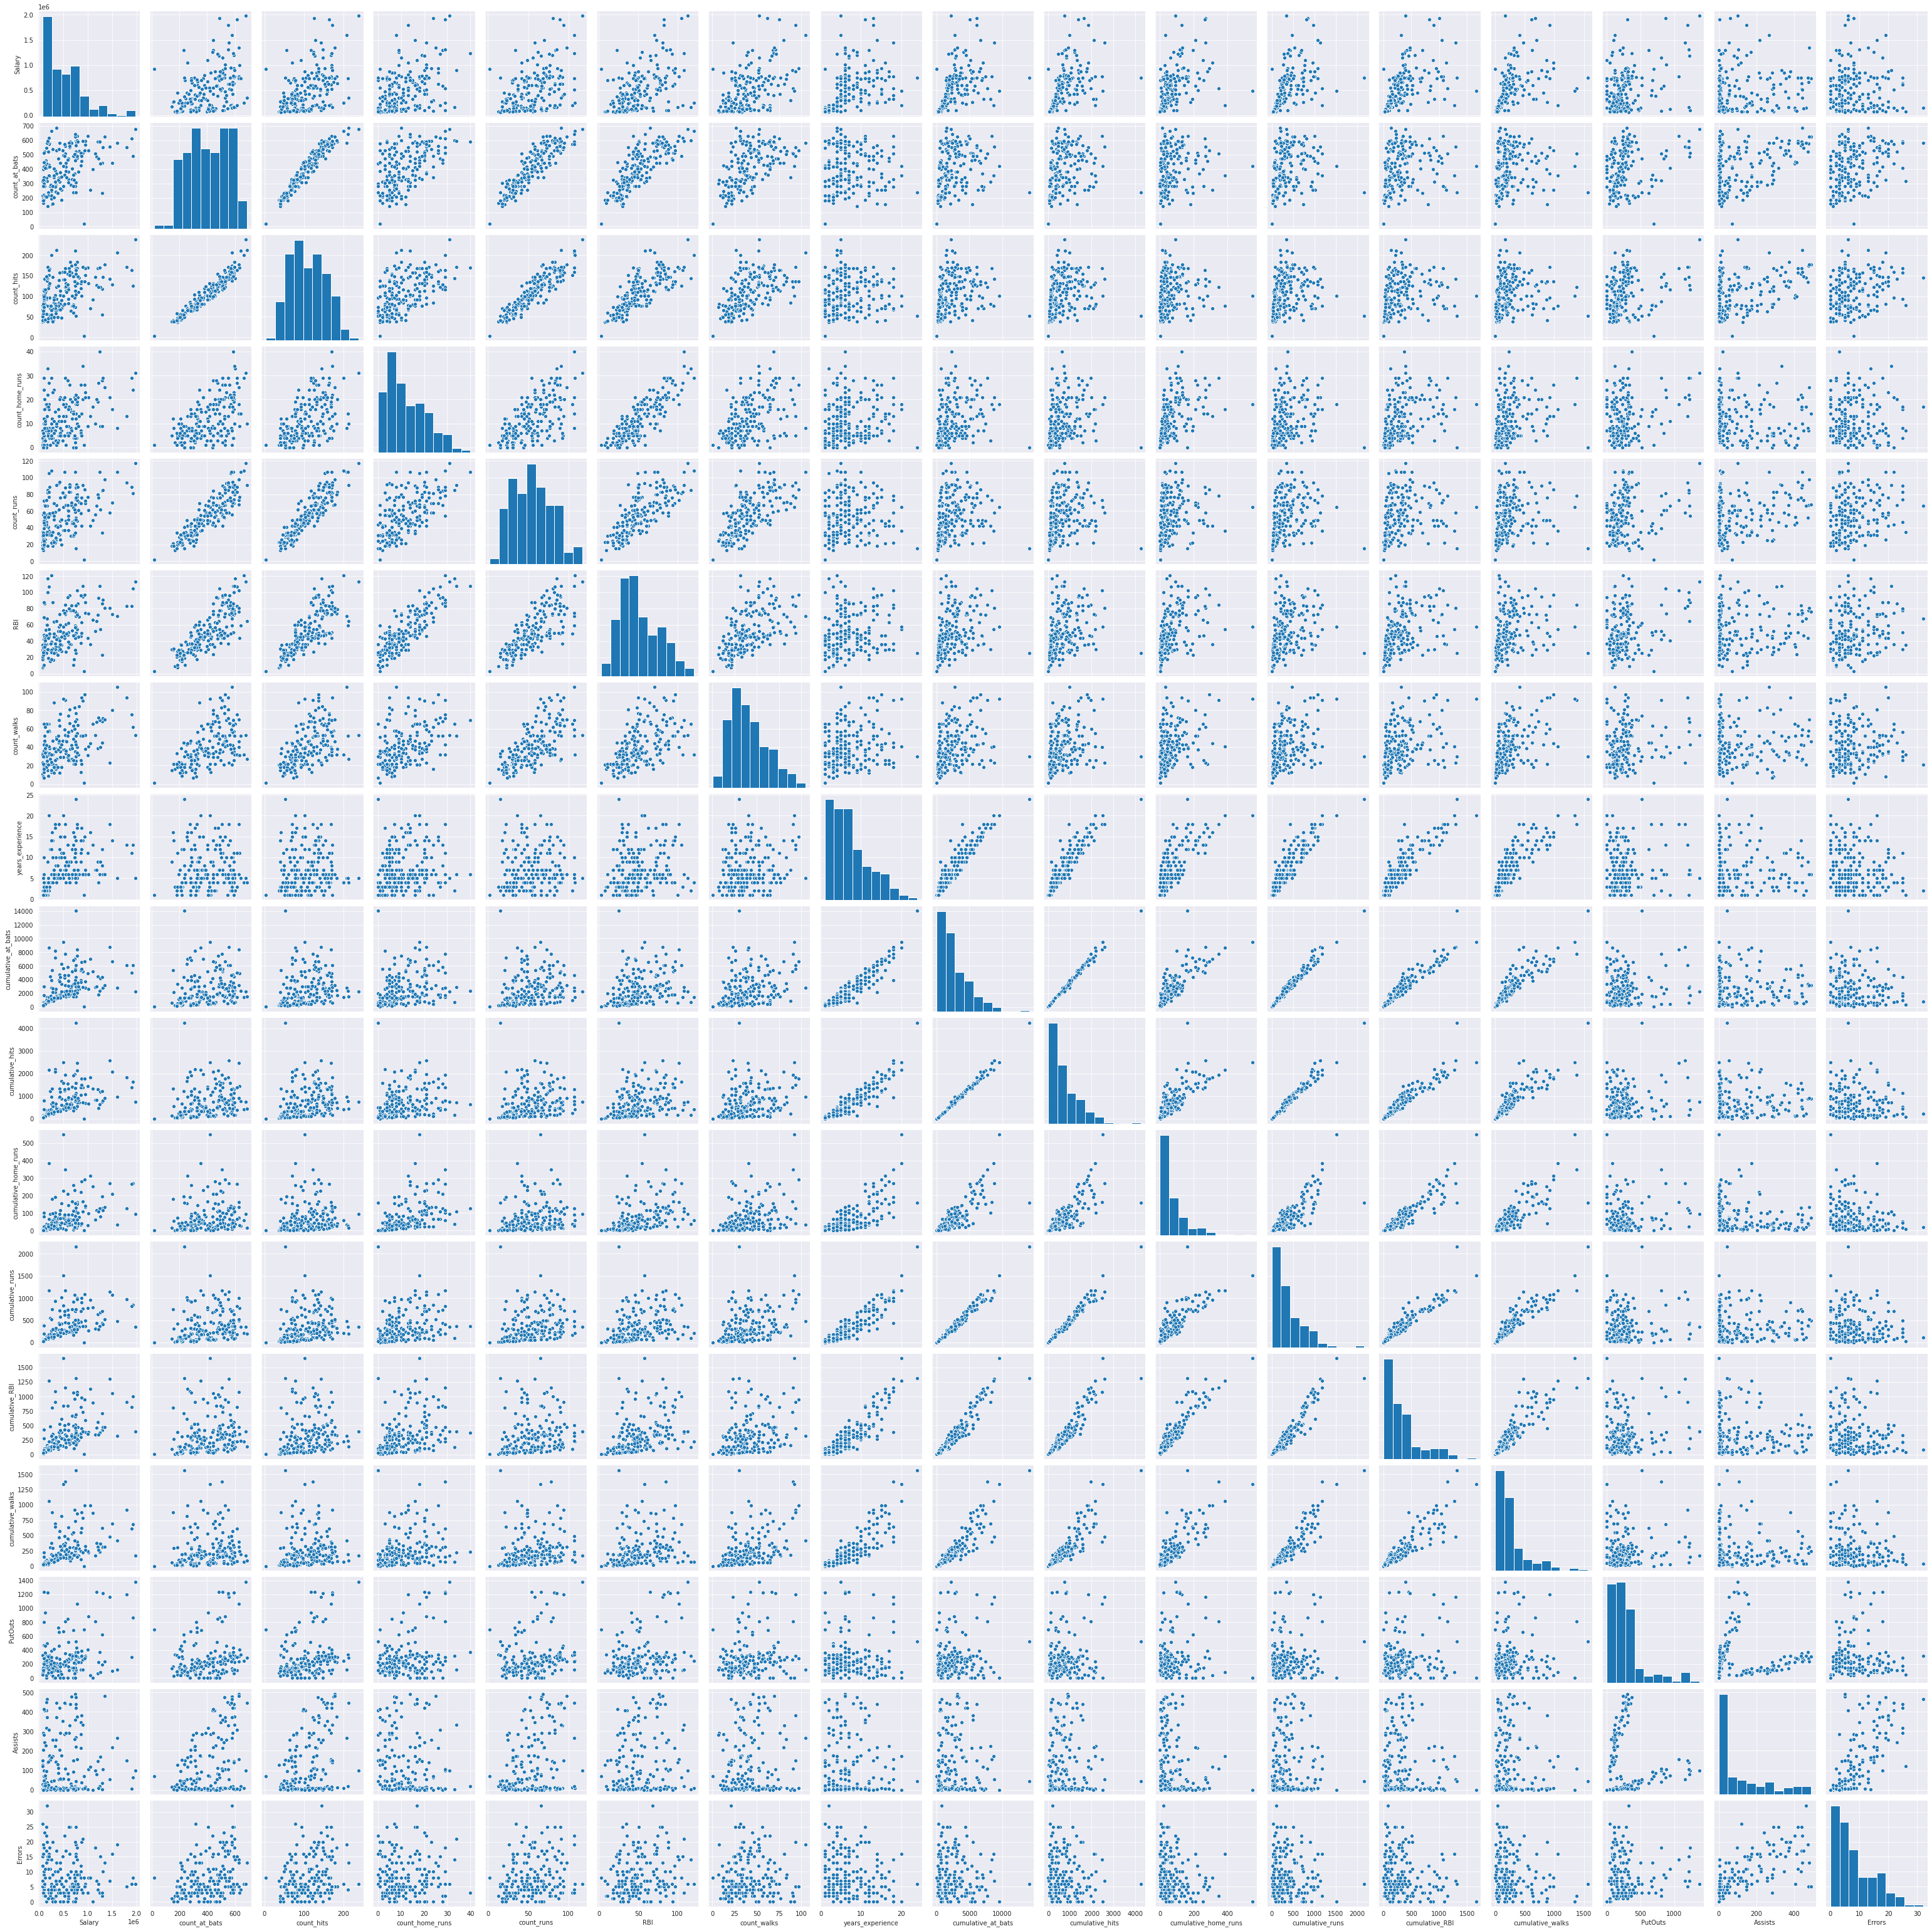

In [8]:
sns.set_style('darkgrid')
sns.pairplot(my_df_cleaned, size = 2.5)
plt.show()

### From the plot, we can get some information.

*   The players who have higher salary seem to have higher performance.

*   From the trend between each variable, it seems that the propotion of players who have high performance (ex. cumulative_RBI, cumulative_runs, cumulative_hits...) is less than the average. Hence, the number of players who have higher income is less the the number of players who have average salary.

Let's take a deeper look at those who have above average income.

### Explore the data for those who have above average salary

In [9]:
sal_df_cleaned = my_df_cleaned[my_df_cleaned['Salary'] > my_df_cleaned['Salary'].mean()]
sal_df_cleaned.describe().round(3)

,Salary,count_at_bats,count_hits,count_home_runs,count_runs,RBI,count_walks,years_experience,cumulative_at_bats,cumulative_hits,cumulative_home_runs,cumulative_runs,cumulative_RBI,cumulative_walks,PutOuts,Assists,Errors
count,83.000,83.000,83.000,83.000,83.000,83.000,83.000,83.000,83.000,83.000,83.000,83.000,83.000,83.000,83.000,83.000,83.000
mean,881795.181,475.398,131.482,14.795,65.916,63.566,50.337,9.253,3856.711,1072.024,105.795,540.566,492.554,385.735,354.783,129.289,8.373
std,338797.254,121.132,39.769,8.692,21.899,23.936,21.856,4.353,2177.862,633.847,82.609,326.413,306.184,290.095,310.395,155.119,6.310
min,525000.000,19.000,4.000,0.000,2.000,3.000,1.000,1.000,19.000,4.000,1.000,2.000,3.000,1.000,0.000,0.000,0.000
25%,660000.000,402.000,111.000,8.000,49.500,47.000,33.500,6.000,2328.000,647.000,40.500,309.500,286.000,193.500,165.500,8.000,4.000
50%,750000.000,492.000,133.000,14.000,67.000,63.000,47.000,8.000,3146.000,900.000,84.000,445.000,384.000,289.000,276.000,53.000,6.000
75%,975000.000,574.500,162.000,20.500,82.000,81.000,66.500,12.500,5175.500,1385.000,142.500,726.500,663.000,465.000,367.500,240.000,11.000
max,1975000.000,677.000,238.000,40.000,117.000,113.000,105.000,24.000,14053.000,4256.000,347.000,2165.000,1314.000,1566.000,1377.000,492.000,25.000


*  From the analysis above, we can make sure that the players who have higher salary have better performance and more experiences.

*  The number of players who have above average income is less than the number of those whose income is less than the average.


   For more details, let's look at the heat map.

### Correlation among all numeric variables

Plot the heat map to show correlation between each variable

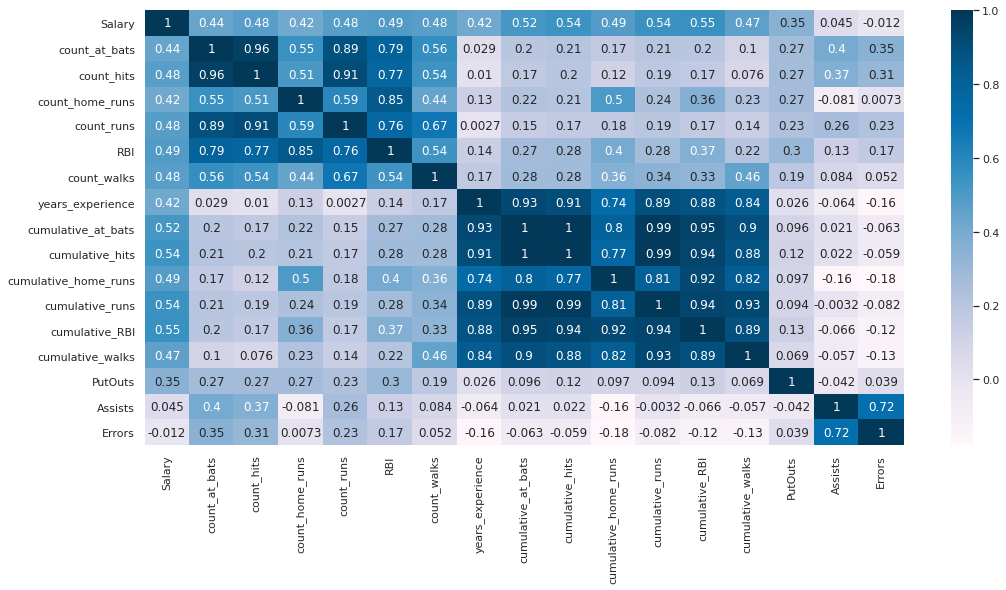

In [10]:
sns.set(font_scale=1)
plt.figure(figsize=(17,8))
sns.heatmap(my_df_cleaned.corr(), annot=True, cmap = 'PuBu')
plt.xticks(rotation=90)
plt.show()

### From the heat map, we can find the correlation among variables.

*   Salary has relatively high correlation (>0.45) with cumulative_RBI, cumulative_runs, cumulative_hits, cumulative_at_bats, RBI, cumulative_home_runs, count_hits, count_runs, count_walks, cumulative_walks

*   There are also high correlation among years_experience, cumulative_at_bats, cumulative_hits, cumulative_home_runs, cumulative_runs, cumulative_RBI, cumulative_walks --> these variables may also have high correlation with salary.

### Explore League, Division, and New League Variables

Division and League

In [11]:
table = pd.crosstab(my_df_cleaned.Division, my_df_cleaned.League)
table

League,A,N
Division,,
E,50,43
W,52,39


Find the average salary

In [12]:
AE_df = my_df_cleaned[[all([a,b]) for a,b in zip(my_df_cleaned['League'] == 'A', my_df_cleaned['Division'] == 'E')]]
print('League A Division E average salary: ', AE_df.Salary.mean())

AW_df = my_df_cleaned[[all([a,b]) for a,b in zip(my_df_cleaned['League'] == 'A', my_df_cleaned['Division'] == 'W')]]
print('League A Division W average salary: ', AW_df.Salary.mean())

NE_df = my_df_cleaned[[all([a,b]) for a,b in zip(my_df_cleaned['League'] == 'N', my_df_cleaned['Division'] == 'E')]]
print('League N Division E average salary: ', NE_df.Salary.mean())

NW_df = my_df_cleaned[[all([a,b]) for a,b in zip(my_df_cleaned['League'] == 'N', my_df_cleaned['Division'] == 'W')]]
print('League N Division W average salary: ', NW_df.Salary.mean())

League A Division E average salary:  573720.0
League A Division W average salary:  473769.23076923075
League N Division E average salary:  559441.8604651163
League N Division W average salary:  486358.9743589744


Division and New League

In [13]:
table2 = pd.crosstab(my_df_cleaned.Division, my_df_cleaned.NewLeague)
table2

NewLeague,A,N
Division,,
E,52,41
W,55,36


Find the average salary

In [14]:
AE_df2 = my_df_cleaned[[all([a,b]) for a,b in zip(my_df_cleaned['NewLeague'] == 'A', my_df_cleaned['Division'] == 'E')]]
print('New League A Division E average salary: ', AE_df2.Salary.mean())

AW_df2 = my_df_cleaned[[all([a,b]) for a,b in zip(my_df_cleaned['NewLeague'] == 'A', my_df_cleaned['Division'] == 'W')]]
print('New League A Division W average salary: ', AW_df2.Salary.mean())

NE_df2 = my_df_cleaned[[all([a,b]) for a,b in zip(my_df_cleaned['NewLeague'] == 'N', my_df_cleaned['Division'] == 'E')]]
print('New League N Division E average salary: ', NE_df2.Salary.mean())

NW_df2 = my_df_cleaned[[all([a,b]) for a,b in zip(my_df_cleaned['NewLeague'] == 'N', my_df_cleaned['Division'] == 'W')]]
print('New League N Division W average salary: ', NW_df2.Salary.mean())

New League A Division E average salary:  563576.9230769231
New League A Division W average salary:  484290.9090909091
New League N Division E average salary:  571609.756097561
New League N Division W average salary:  471333.3333333333


### From the analysis above, we get some information

*   The number of players in League A are larger but quite similiar to N 

*   Players in division E have higher salary (above average salary) no matter what league they are in 

*   There may be some relation between devision and salary

### Let's take a look on the regression result of these variables

In [15]:
le = LabelEncoder()

my_df_cleaned['Division']= le.fit_transform(my_df_cleaned['Division'])
print(dict(zip(le.classes_, le.transform(le.classes_))))
my_df_cleaned['League']= le.fit_transform(my_df_cleaned['League'])
print(dict(zip(le.classes_, le.transform(le.classes_))))
my_df_cleaned['NewLeague']= le.fit_transform(my_df_cleaned['NewLeague'])
print(dict(zip(le.classes_, le.transform(le.classes_))))

X_cols = ['cumulative_RBI', 'cumulative_runs', 'cumulative_hits', 'cumulative_at_bats', 'RBI', 'cumulative_home_runs', 'count_hits', 'count_runs', 'count_walks', 'cumulative_walks', 'count_at_bats', 'count_home_runs', 'years_experience', 'Division','League', 'PutOuts', 'Assists', 'Errors', 'NewLeague']
X = my_df_cleaned[X_cols].values

data_length = len(my_df_cleaned)
column_length = len(my_df_cleaned[X_cols].columns)

X = X.reshape(data_length,column_length)
y = my_df_cleaned['Salary'].values
y = y.reshape(data_length,1)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

lin_reg= LinearRegression()
lin_reg.fit(X_train, y_train)

listing_y_pred = lin_reg.predict(X_test)

print((pd.DataFrame(listing_y_pred, columns={'y_prediction'}).head(5)))
print()

print('Intercept:', float(lin_reg.intercept_))

coeff_df = pd.DataFrame(lin_reg.coef_)
coeff_df.columns = X_cols
print(coeff_df)
print()

print("Mean Squared Error (MSE):%.2f" % mean_squared_error(y_test, listing_y_pred))

print('Variance Score (R^2):%.2f' % r2_score(y_test, listing_y_pred))

{'E': 0, 'W': 1}
{'A': 0, 'N': 1}
{'A': 0, 'N': 1}
   y_prediction
0  1.523554e+05
1  7.764776e+04
2  4.051666e+05
3  5.313655e+05
4  1.619754e+06

Intercept: 19140.726938218053
   cumulative_RBI  cumulative_runs  ...       Errors     NewLeague
0      1414.23751      2349.211034  ... -7038.129402 -58778.838998

[1 rows x 19 columns]

Mean Squared Error (MSE):73121727630.19
Variance Score (R^2):0.47


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

### Outcome of regression result 

From the analysis above, mean Squared error is huge, it may seems that the model is too complex and overfitted. There are three ways to solve the problem

1. Increase the size of dataset
2. Choose a suitable model complexity
3. Use regularization to reduce the value of coefficient

For the further analysis, I will choose the third way to test the effectiveness.

### Let's take a look on using sklearn's implementation of logistic regression --> Not suitable for this data set

In [16]:
X = my_df_cleaned[['cumulative_RBI', 'cumulative_runs', 'cumulative_hits', 'cumulative_at_bats', 'RBI', 'cumulative_home_runs', 'count_hits', 'count_runs', 'count_walks', 'cumulative_walks', 'count_at_bats', 'count_home_runs', 'years_experience', 'Division','League', 'PutOuts', 'Assists', 'Errors', 'NewLeague']]
y = my_df_cleaned['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

log_model = LogisticRegression()
log_model.fit(X_train, y_train.values.ravel())

print('Logistic regression score: ', log_model.score(X_test, y_test))

Logistic regression score:  0.021739130434782608


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Outcome of logistic regression (Not suitable for this data set)

*  The score is low, the main reason is that this data set is not suitable of logistic regression model. Logistic regression is suitable for binary problem. The attributes of salary is continuous.


Let's use regularized models to find out if we can train the model better.

# Part2. Regularized Models

In this part, I will use different value of alpha on Ridge and Lasso  to conduct my regularization

### Data preprocessing

In [0]:
X = my_df_cleaned.drop(['Salary'], axis=1)
y = my_df_cleaned['Salary']

# Model1 - Ridge

### Split the samples into a training set and a test set 

In [0]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Fit a ridge  model on the training set, and evaluate its MSE on the test set, using alpha = 5

In [19]:
model = Ridge(alpha = 5, normalize = True)
model.fit(X_train, y_train.values.ravel())           
pred = model.predict(X_test)          
print(pd.Series(model.coef_, index = X.columns)) 
print(mean_squared_error(y_test, pred))  

count_at_bats             111.966755
count_hits                466.814193
count_home_runs          1558.717255
count_runs                809.131750
RBI                       680.727262
count_walks               921.861728
years_experience         2470.870019
cumulative_at_bats          6.512866
cumulative_hits            25.839813
cumulative_home_runs      146.086910
cumulative_runs            48.489562
cumulative_RBI             50.606998
cumulative_walks           41.821960
League                   8747.127693
Division               -17245.580134
PutOuts                    64.036007
Assists                    12.023278
Errors                   -306.833695
NewLeague                6792.692589
dtype: float64
76212029934.2739


In [20]:
model.score(X_test, y_test)

0.43172211299507923

### Ridge outcome when alpha = 5

*  The test MSE is 76212029934, which is slightly higher than the analysis we have done before. 

*  The weights of 'Division' is quite huge, which means that our assumption is correct.

*  The test score is 43%, which is quite low.

Let's try bigger and smaller alpha to find out the result


### What happens if we use a higher value of alpha. We supposed alpha as 100

In [21]:
model2 = Ridge(alpha = 100, normalize = True)
model2.fit(X_train, y_train.values.ravel())          
pred2 = model2.predict(X_test)           
print(pd.Series(model2.coef_, index = X.columns)) 
print(mean_squared_error(y_test, pred2))  

count_at_bats             12.542019
count_hits                45.021731
count_home_runs          180.303770
count_runs                80.345678
RBI                       75.648381
count_walks               94.549402
years_experience         311.626529
cumulative_at_bats         0.773946
cumulative_hits            2.877284
cumulative_home_runs      19.146803
cumulative_runs            5.569212
cumulative_RBI             5.911125
cumulative_walks           5.674125
League                    66.624255
Division               -1136.752085
PutOuts                    5.100559
Assists                    1.908007
Errors                    -0.786442
NewLeague                110.711296
dtype: float64
126671691584.97165


In [22]:
model2.score(X_test, y_test)

0.05546773522071091

### Ridge outcome when alpha = 100

*  The big alpha shrinks the coefficients. All weight of variables got shrunk.This over-shrinking makes the model more biased, resulting in a much higher MSE.

*  Till now we can find that fitting a ridge regression model with alpha = 5 leads to a much lower test MSE and a much higher test score than fitting a model with a higher alpha(100).

### What happens if we use the smaller value of alpha. We supposed the alpha as 0

In [23]:
model3 = Ridge(alpha = 0, normalize = True)
model3.fit(X_train, y_train.values.ravel())             
pred = model3.predict(X_test)            
print(pd.Series(model3.coef_, index = X.columns)) 
print(mean_squared_error(y_test, pred)) 

count_at_bats            -2275.975471
count_hits                9547.496788
count_home_runs          19088.006186
count_runs               -3141.365098
RBI                      -4960.256519
count_walks               7987.934859
years_experience         10202.821313
cumulative_at_bats        -203.544699
cumulative_hits           -202.616765
cumulative_home_runs     -1421.170241
cumulative_runs           2425.433061
cumulative_RBI            1271.082210
cumulative_walks         -1561.126768
League                  160505.636649
Division                -79133.567830
PutOuts                    271.983467
Assists                    478.654532
Errors                   -7073.304308
NewLeague               -48386.861548
dtype: float64
67248971502.961876


In [24]:
model3.score(X_test, y_test)

0.4985554975780686

### Ridge outcome when alpha = 0

*  We can find that when we decrease the value of alpha, we can get better result. The MSE will decrease and the test score will be higher.

*  The weights of the variables become larger because we lower the value of alpha

*  The weight of 'league' become the largest one

*  We can find that when we lower our value of alpha, the MSE will be lower and the test score will get higher.

### Use cross-validation to choose the better alpha for the model

From the analysis above, I found that when we lower the value of alpha, the performance will be better.
So I generate the range of alpha value from 0.05-0.09 and use cross-validation to find the best fit for the model

In [25]:
alphas = np.linspace(0.05, 0.09, 100)
alphas

array([0.05      , 0.05040404, 0.05080808, 0.05121212, 0.05161616,
       0.0520202 , 0.05242424, 0.05282828, 0.05323232, 0.05363636,
       0.0540404 , 0.05444444, 0.05484848, 0.05525253, 0.05565657,
       0.05606061, 0.05646465, 0.05686869, 0.05727273, 0.05767677,
       0.05808081, 0.05848485, 0.05888889, 0.05929293, 0.05969697,
       0.06010101, 0.06050505, 0.06090909, 0.06131313, 0.06171717,
       0.06212121, 0.06252525, 0.06292929, 0.06333333, 0.06373737,
       0.06414141, 0.06454545, 0.06494949, 0.06535354, 0.06575758,
       0.06616162, 0.06656566, 0.0669697 , 0.06737374, 0.06777778,
       0.06818182, 0.06858586, 0.0689899 , 0.06939394, 0.06979798,
       0.07020202, 0.07060606, 0.0710101 , 0.07141414, 0.07181818,
       0.07222222, 0.07262626, 0.0730303 , 0.07343434, 0.07383838,
       0.07424242, 0.07464646, 0.07505051, 0.07545455, 0.07585859,
       0.07626263, 0.07666667, 0.07707071, 0.07747475, 0.07787879,
       0.07828283, 0.07868687, 0.07909091, 0.07949495, 0.07989

### Find out the better alpha by cross-validation

Let's find out the best alpha 

In [26]:
ridgecv = RidgeCV(alphas = alphas, normalize=True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.09

MSE score when alpha is best fit

In [27]:
model4 = Ridge(alpha = ridgecv.alpha_, normalize = True)
model4.fit(X_train, y_train)          
pred4 = model4.predict(X_test)          
print(pd.Series(model4.coef_, index = X.columns)) 
print(mean_squared_error(y_test, pred4))  

count_at_bats             -456.741649
count_hits                2465.002183
count_home_runs           3517.556245
count_runs                2449.056190
RBI                       -162.474118
count_walks               3285.725873
years_experience           482.403997
cumulative_at_bats           7.456639
cumulative_hits            121.306835
cumulative_home_runs        88.512298
cumulative_runs            190.288659
cumulative_RBI             194.761302
cumulative_walks          -306.494517
League                  103741.649095
Division                -75408.636677
PutOuts                    249.891234
Assists                     77.091291
Errors                   -5039.573474
NewLeague               -20405.698298
dtype: float64
53616844078.27391


### Using the best alpha to show the result

In [28]:
model4.score(X_test, y_test)

0.6002039719063927

###  Ridge performance  when alpha is the best fit (test score = 0.60)

*  From the cross validation, we get the better alpha for the model. The mean square error is smaller and the test score is better

*  All coefficient of the variables are non zero.

*  When the alpha get larger, the weights of the variable shrunk. When I lower my alpha, the weights all increase

*  We can find that the 'League' has the most significant impact on players salary. The second factor is 'Division'.

*  'Assists', 'cumulative_at_bats', and 'cumulative_home_runs' have little impact on salary.


It's time to take a look on the prediction of players' salary!

### Use the model to predict salary

In [29]:
prediction_df = pd.DataFrame(model4.predict(X_test).round(), columns = {'Prediction'}).set_index([pd.Index(X_test.index)])
all_together_df = X_test.join(y_test).join(prediction_df)
all_together_df[['Salary', 'Prediction']].head()

,Salary,Prediction
139,90000,91867.0
106,225000,123066.0
7,125000,374281.0
107,613000,542864.0
60,1450000,1298198.0


##  Performance of using Ridge to predict the salary

*  The test score is only 60.02%, it's hard to make a accurately prediction. From the result we can find that some predictions close to the real data, some don't. 

*  From this analysis, we can find that when we increase the value of alpha, the weights of all variables will be shrunk and it will make our model more bias. If we lower the value of alpha, I can generate a better model to predict the salary.

Let's take a look at Lasso model. To see if we can get a better result!

# Model2 - Lasso

### Fit a lasso model on the training set, and evaluate its MSE on the test set, using alpha = 5

In [30]:
las_model = Lasso(alpha = 5, max_iter = 10000, normalize = True)
las_model.fit(X_train, y_train.values.ravel())           
las_pred = las_model.predict(X_test)          
print(pd.Series(las_model.coef_, index = X.columns)) 
print(mean_squared_error(y_test, las_pred))  

count_at_bats            -2246.731587
count_hits                9321.426117
count_home_runs          18474.403436
count_runs               -2813.130411
RBI                      -4783.214784
count_walks               7837.957490
years_experience         10298.174695
cumulative_at_bats        -212.835865
cumulative_hits            -85.509019
cumulative_home_runs     -1168.650326
cumulative_runs           2271.863621
cumulative_RBI            1161.977687
cumulative_walks         -1510.638340
League                  159910.920492
Division                -77846.177413
PutOuts                    271.394267
Assists                    476.849022
Errors                   -7087.088023
NewLeague               -49002.345857
dtype: float64
66560860543.84788


In [31]:
las_model.score(X_test, y_test)

0.503686423000308

### Lasso outcome when alpha = 5

*  When alpha = 5, the test MSE is 66576585511, which is smaller than that of ridge when alpha equals to 5 and the test score is higher. But we still need to take a deeper look inside it, to find out if we can decrease the value of mean square error more.

*  The weights of all variables in Lasso are higher than those of Ridge.

*  'League' has the most significant compact on salary.

Let's try bigger and smaller alpha to find out the result


### What happens if we use a higher value of alpha. We supposed alpha as 100

In [32]:
las_model2 = Lasso(alpha = 100, max_iter = 10000, normalize = True)
las_model2.fit(X_train, y_train.values.ravel())          
las_pred2 = las_model2.predict(X_test)           
print(pd.Series(las_model2.coef_, index = X.columns)) 
print(mean_squared_error(y_test, las_pred2)) 

count_at_bats            -2206.539525
count_hits                8112.766245
count_home_runs          11900.197661
count_runs                -309.715228
RBI                      -2759.836019
count_walks               6900.287456
years_experience             0.000000
cumulative_at_bats         -66.490311
cumulative_hits              0.000000
cumulative_home_runs        -0.000000
cumulative_runs           1385.125115
cumulative_RBI             514.295670
cumulative_walks         -1236.217591
League                  137733.174584
Division                -72461.961766
PutOuts                    275.935801
Assists                    343.501802
Errors                   -6608.751219
NewLeague               -40640.564462
dtype: float64
61183760921.69735


In [33]:
las_model2.score(X_test, y_test)

0.5437809699389726

### Lasso outcome when alpha = 100

*  When alpha = 100, the test MSE get smaller, and the test score get higher compare to alpha equals to 5. It's an interesting finding! The result is quite different to Ridge.

*  The performance of Lasso is much better than Ridge when alpha equals to 100. It seems that Lasso will not be impacted tremendously when the alpha change.

*  We can also find an interesting outcome! Some weights of the variables are zero, which means that those variables have small imapct on the model. Lasso will not take these variables into account.

*  'League' has the highest weight.



### What happens if we use the smaller value of alpha. We supposed the alpha as 0

In [34]:
las_model3 = Lasso(alpha = 0, max_iter = 10000, normalize = True)
las_model3.fit(X_train, y_train.values.ravel())          
las_pred3 = las_model3.predict(X_test)           
print(pd.Series(las_model3.coef_, index = X.columns)) 
print(mean_squared_error(y_test, las_pred3)) 

count_at_bats            -2275.975436
count_hits                9547.496617
count_home_runs          19088.005954
count_runs               -3141.364937
RBI                      -4960.256451
count_walks               7987.934748
years_experience         10202.822400
cumulative_at_bats        -203.544721
cumulative_hits           -202.616653
cumulative_home_runs     -1421.170072
cumulative_runs           2425.432981
cumulative_RBI            1271.082149
cumulative_walks         -1561.126736
League                  160505.637571
Division                -79133.566825
PutOuts                    271.983466
Assists                    478.654539
Errors                   -7073.304330
NewLeague               -48386.862454
dtype: float64
67248971243.75951


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4532557019574.559, tolerance: 2300145199.21875
  positive)


In [35]:
las_model3.score(X_test, y_test)

0.4985554995108209

### Lasso outcome when alpha = 0

*  When we decrease the value of alpha, the mean square error and test score got lower but don't change a lot. 

*  Lasso has slightly different performance when the alpha is different. From the analysis, it may seem that the lasso model will have a better prediction when alpha get larger.

Let's use cross validation to find out the better alpha and to see if our prediction will be better or not.

### Use cross-validation to choose the better alpha for the model

From the analysis above, I found that when we increase the value of alpha, the performance will be better.

So I generate the range of alpha value from 400-800 and use cross-validation to find the best fit for the model

In [36]:
lasso_alphas = np.linspace(400, 800, 200)
lasso_alphas

array([400.        , 402.01005025, 404.0201005 , 406.03015075,
       408.04020101, 410.05025126, 412.06030151, 414.07035176,
       416.08040201, 418.09045226, 420.10050251, 422.11055276,
       424.12060302, 426.13065327, 428.14070352, 430.15075377,
       432.16080402, 434.17085427, 436.18090452, 438.19095477,
       440.20100503, 442.21105528, 444.22110553, 446.23115578,
       448.24120603, 450.25125628, 452.26130653, 454.27135678,
       456.28140704, 458.29145729, 460.30150754, 462.31155779,
       464.32160804, 466.33165829, 468.34170854, 470.35175879,
       472.36180905, 474.3718593 , 476.38190955, 478.3919598 ,
       480.40201005, 482.4120603 , 484.42211055, 486.4321608 ,
       488.44221106, 490.45226131, 492.46231156, 494.47236181,
       496.48241206, 498.49246231, 500.50251256, 502.51256281,
       504.52261307, 506.53266332, 508.54271357, 510.55276382,
       512.56281407, 514.57286432, 516.58291457, 518.59296482,
       520.60301508, 522.61306533, 524.62311558, 526.63

### Find out the better alpha by cross-validation

Let's find out the best alpha

In [37]:
lassocv = LassoCV(alphas=lasso_alphas, cv=20, max_iter=1000, normalize=True)
lassocv.fit(X_train, y_train)
lassocv.alpha_

400.0

MSE score when alpha is best fit

In [38]:
las_model4 = Lasso(alpha = lassocv.alpha_, max_iter = 10000, normalize = True)
las_model4.fit(X_train, y_train.values.ravel())          
las_pred4 = las_model4.predict(X_test)           
print(pd.Series(las_model4.coef_, index = X.columns)) 
print(mean_squared_error(y_test, las_pred4)) 

count_at_bats           -1298.232352
count_hits               5449.350925
count_home_runs          4235.134752
count_runs                468.522317
RBI                        -0.000000
count_walks              4865.021046
years_experience            0.000000
cumulative_at_bats          0.000000
cumulative_hits             0.000000
cumulative_home_runs        0.000000
cumulative_runs           667.602736
cumulative_RBI            291.682759
cumulative_walks         -645.112383
League                  86147.001971
Division               -66533.026846
PutOuts                   251.395913
Assists                    56.678052
Errors                  -3946.202389
NewLeague                  -0.000000
dtype: float64
54567271056.35096


### Using the best alpha to show the result

In [39]:
las_model4.score(X_test, y_test)

0.593117077156051

###  Lasso outcome when alpha is the best fit (test score = 0.593)

*  From the cross validation, we get the better alpha for the model. The mean square error is smaller and the test score is better.

*  Actually the outcome does not change a lot from different alpha. But we still get better model when alpha is 400.

*  The MSE and test score of Lasso regression perform a little worse than  MSE and test score of ridge regression with alpha chosen by cross-validation.

*  Some coefficient of the variables in lasso regression are zero which is quite different from ridge.

*  Lasso has advantage over ridge regression in that the resulting coefficient estimates are sparse.

*  We can find that when the alpha is best fit for the model, some variables weight become zero. It means that Lasso does not take these variables into account because they only have minor effect on the model.

     *  'RBI', 'years_experience', 'cumulative_at_bats', 'cumulative_hits', 'cumulative_home_runs' have little impact on the model, so lasso does not take them into consideration. --> which have similar result to Ridge outcome, these variables in Ridge model also have relatively small impact on the prediction.

*  Lasso has the same result as ridge, 'League' and 'Division' has the most significant impact on the prediction.





### Use the model to predict the salary

In [40]:
lasso_prediction_df = pd.DataFrame(las_model4.predict(X_test).round(), columns = {'Prediction'}).set_index([pd.Index(X_test.index)])
lasso_all_together_df = X_test.join(y_test).join(lasso_prediction_df)
lasso_all_together_df[['Salary', 'Prediction']].head()

,Salary,Prediction
139,90000,134228.0
106,225000,118259.0
7,125000,380838.0
107,613000,561923.0
60,1450000,1351116.0


###  Performance of using Lasso to predict the salary

*  Lasso got the higher prediction price than ridge.

*  The test score is only 59.3%, it's hard to make a accurately prediction. From the result we can find that some predictions close to the real data, some don't. 

*  From this analysis, we can find that when we increase the value of alpha, the weights of some variables will be shrunk to zero but it does not make our model more bias. Lasso will exclude the variables which are useless for the model. It's quite different with Ridge.

# Conclusion

From the analysis above, I really have some interesting findings!

*   When I have my alpha increased

      *  Ridge: The test score will be really low and MSE will become pretty large. Also, the weight of variables got shrunk, the model become more bias.

      *  Lasso: The test score get better(but alpha cannot be infinite). Some variables weight become zero, but some remain high. Lasso will not take those variables which only have minor influence of the prediction into account. It will set their weights to zero and make the model not so complex.

*   Which variables have biggerst impact of the prediction?

      *  'League' and 'Division'. Actually I got surprised from the result. I think other factors can have more impact on the salary. From the outcome, it tells us if we hope to get a higher pay as a baseball player, we need to choose the right League and Division!

*   Ridge or Lasso?

      *  From my perspective, I think both of them work well! But if I indeed need to choose one, I will choose Lasso. Though Ridge has a slightly better performance in this analysis, Lasso can 
         1. Exclude not so useful variables which I think is a good advantage. Lasso can decrease the complexity of the model 
         2. The shrinking and removing of the coefficients can reduce variance without a substantial increase of the bias. This feature is much better than Ridge. I think the prediction of Lasso is more steady.

### Reference

I got deeper understanding of Ridge and Lasso regression from the link below:

https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/

I take my regularization analysis reference as the link:

http://www.science.smith.edu/~jcrouser/SDS293/labs/2016/lab10/Lab%2010%20-%20Ridge%20Regression%20and%20the%20Lasso%20in%20Python.pdf

